In [29]:
import matplotlib.pyplot as plt
import numpy as np

cgd_transfer_cost = 1 # €
t212_card_fee = 0.7 # =0.7%
min_cashback = 0.5 # %
max_cashback = 1.5 # %
interest_on_cash = 2.4/100 # % yearly


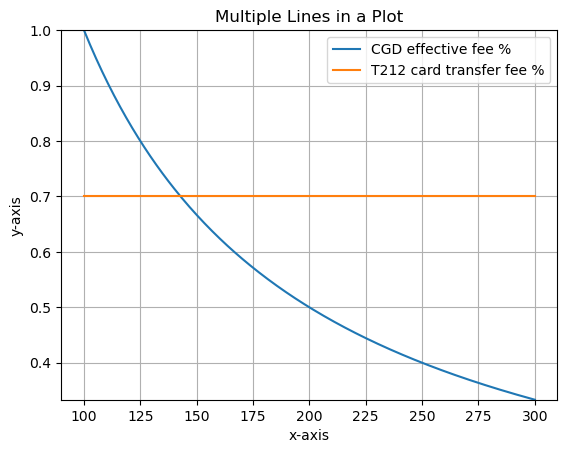

Amount for equal fee = 143.48
Equal min cashback = 200.33
Equal max cashback = 100.00


In [30]:
transfer = np.linspace(100,300,300)
cgd_fee_vs_amount = (1-(transfer-cgd_transfer_cost)/transfer)*100

# Create a plot
plt.plot(transfer, cgd_fee_vs_amount  , label='CGD effective fee %')  # red line for y = x^2
plt.plot(transfer, t212_card_fee*np.ones(len(transfer)) , label='T212 card transfer fee %')

# Add title and labels
plt.title("Multiple Lines in a Plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.ylim([min(cgd_fee_vs_amount) , max(cgd_fee_vs_amount)])

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

i=0
while cgd_fee_vs_amount[i] >= t212_card_fee:
    i +=1
print("Amount for equal fee = %.2f" % (transfer[i]))

i=0
while cgd_fee_vs_amount[i] >= min_cashback:
    i +=1
print("Equal min cashback = %.2f" % (transfer[i]))

i=0
while cgd_fee_vs_amount[i] >= max_cashback:
    i +=1
print("Equal max cashback = %.2f" % (transfer[i]))

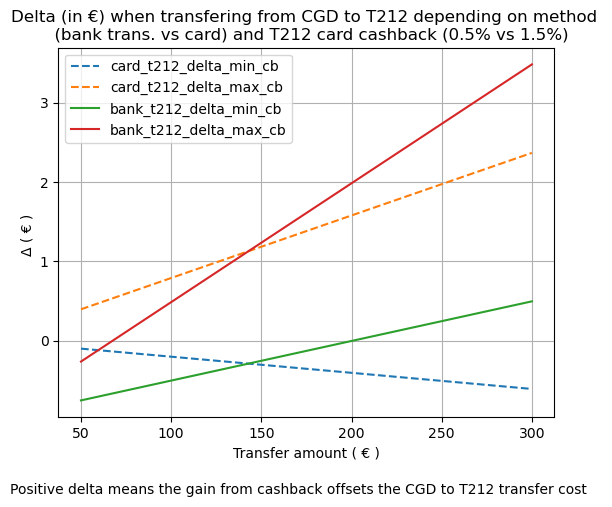

In [31]:
min_trans = 50
max_trans = 300
transfer = np.linspace(min_trans,max_trans)

card_t212_i = transfer*(1-t212_card_fee/100)
card_t212_delta_min_cb = card_t212_i - transfer + min_cashback/100*card_t212_i
card_t212_delta_max_cb = card_t212_i - transfer + max_cashback/100*card_t212_i

bank_t212_i = transfer-cgd_transfer_cost
bank_t212_delta_min_cb =  bank_t212_i*(1+min_cashback/100) - transfer # = bank_t212_i + bank_t212_i*min_cashback - transfer 
bank_t212_delta_max_cb = bank_t212_i*(1+max_cashback/100) - transfer


# Create a plot
plt.plot(transfer, card_t212_delta_min_cb  , "--", label='card_t212_delta_min_cb')  
plt.plot(transfer, card_t212_delta_max_cb  , "--", label='card_t212_delta_max_cb')  
plt.plot(transfer, bank_t212_delta_min_cb  , label='bank_t212_delta_min_cb')  
plt.plot(transfer, bank_t212_delta_max_cb  , label='bank_t212_delta_max_cb')  

# Add title and labels
plt.title("Delta (in €) when transfering from CGD to T212 depending on method \n  (bank trans. vs card) and T212 card cashback (0.5% vs 1.5%)")
plt.xlabel("Transfer amount ( € )")
plt.ylabel("Δ ( € ) ")
txt="Positive delta means the gain from cashback offsets the CGD to T212 transfer cost"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
# if you start with 100€
start = 100
#transfer by each method, you end up with the following amounts in T212
card = start*(1-t212_card_fee/100)
card_percent_diff = (card-start)/start*100
bank = start-cgd_transfer_cost
bank_percent_diff = (bank-start)/start*100
print('if you start with %.2f, transfer by each method, you end up with the following amounts in T212: \n Card: %.2f ( %.1f%% ) \n Bank: %.2f ( %.1f%% )' % (start ,  card,  card_percent_diff, bank , bank_percent_diff))
# and then you spend it with 0.5% cashback, you get back:
cashback = min_cashback # % to absolute
card_cashback = card*cashback/100
bank_cashback = bank*cashback/100
print('\n and then you spend it with %.1f%% cashback, you get back:: \n Card: %.2f €  ⇒ Δ from start: %.2f € ( %.1f%% ) \n Bank: %.2f €  ⇒ Δ from start: %.2f € ( %.1f%% ) ' % (cashback ,  card_cashback ,  card+card_cashback-start , (card+card_cashback-start)/start*100 , bank_cashback ,  bank+bank_cashback-start , (bank+bank_cashback-start)/start*100))
# and then you spend it with 1.5% cashback, you get back:
cashback = max_cashback # % to absolute
card_cashback = card*cashback/100
bank_cashback = bank*cashback/100
print('\n and then you spend it with %.1f%% cashback, you get back:: \n Card: %.2f €  ⇒ Δ from start: %.2f € ( %.1f%% ) \n Bank: %.2f €  ⇒ Δ from start: %.2f € ( %.1f%% ) ' % (cashback ,  card_cashback ,  card+card_cashback-start , (card+card_cashback-start)/start*100 , bank_cashback ,  bank+bank_cashback-start , (bank+bank_cashback-start)/start*100))


if you start with 100.00, transfer by each method, you end up with the following amounts in T212: 
 Card: 99.30 ( -0.7% ) 
 Bank: 99.00 ( -1.0% )

 and then you spend it with 0.5% cashback, you get back:: 
 Card: 0.50 €  ⇒ Δ from start: -0.20 € ( -0.2% ) 
 Bank: 0.49 €  ⇒ Δ from start: -0.50 € ( -0.5% ) 

 and then you spend it with 1.5% cashback, you get back:: 
 Card: 1.49 €  ⇒ Δ from start: 0.79 € ( 0.8% ) 
 Bank: 1.49 €  ⇒ Δ from start: 0.48 € ( 0.5% ) 


In [37]:
# Putting 200€ per month through bank transfer 
start = 250
#transfer by each method, you end up with the following amounts in T212
bank = start-cgd_transfer_cost
bank_percent_diff = (bank-start)/start*100
print('Bank transfer %.2f, in T212 you end up with: \n Bank: %.2f ( %.1f%% )' % (start , bank , bank_percent_diff))
# and then you spend it with 0.5% cashback, you get back:
cashback = min_cashback # % to absolute
bank_cashback = bank*cashback/100
min_delta = bank+bank_cashback-start
print('\n and then you spend it with %.1f%% cashback, you get back: \n Bank: %.2f €  ⇒ Δ from start: %.2f € ( %.1f%% ) ' % (cashback ,  bank_cashback ,  min_delta , min_delta/start*100))
# and then you spend it with 1.5% cashback, you get back:
cashback = max_cashback # % to absolute
bank_cashback = bank*cashback/100
max_delta = bank+bank_cashback-start
print('\n and then you spend it with %.1f%% cashback, you get back: \n Bank: %.2f €  ⇒ Δ from start: %.2f € ( %.1f%% ) ' % (cashback ,  bank_cashback ,  max_delta , max_delta/start*100))

# physical card is 5€
cost_of_card = 5
# cost_of_card = delta/30*days_to_even  ⇔ 
max_days_to_even = cost_of_card*30/min_delta
min_days_to_even = cost_of_card*30/max_delta
print('\n longest_days_to_even: %.2f \n shortest_days_to_even: %.2f' % (max_days_to_even , min_days_to_even))

Bank transfer 250.00, in T212 you end up with: 
 Bank: 249.00 ( -0.4% )

 and then you spend it with 0.5% cashback, you get back: 
 Bank: 1.25 €  ⇒ Δ from start: 0.25 € ( 0.1% ) 

 and then you spend it with 1.5% cashback, you get back: 
 Bank: 3.73 €  ⇒ Δ from start: 2.74 € ( 1.1% ) 

 longest_days_to_even: 612.24 
 shortest_days_to_even: 54.84
